# Convolutional Neural Networks

## Machine learning on images

In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### MNIST

In [8]:
from tensorflow.keras.datasets import mnist

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

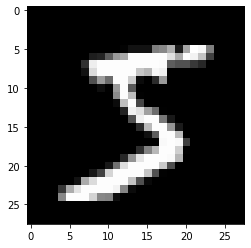

In [13]:
plt.imshow(X_train[0], cmap='gray')

In [14]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [15]:
X_train.shape

(60000, 784)

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [17]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [20]:
y_train[0]

5

In [21]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_train_cat.shape

(60000, 10)

In [23]:
y_test_cat.shape

(10000, 10)

### Fully connected on images

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K

# K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [25]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 5s 13ms/step - loss: 0.3362 - accuracy: 0.8973 - val_loss: 0.1808 - val_accuracy: 0.9434
Epoch 2/10
329/329 [==============================] - 4s 12ms/step - loss: 0.1141 - accuracy: 0.9643 - val_loss: 0.1592 - val_accuracy: 0.9551
Epoch 3/10
329/329 [==============================] - 4s 12ms/step - loss: 0.0725 - accuracy: 0.9786 - val_loss: 0.1586 - val_accuracy: 0.9550
Epoch 4/10
329/329 [==============================] - 4s 12ms/step - loss: 0.0502 - accuracy: 0.9842 - val_loss: 0.1176 - val_accuracy: 0.9705
Epoch 5/10
329/329 [==============================] - 4s 12ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.1116 - val_accuracy: 0.9746
Epoch 6/10
329/329 [==============================] - 4s 12ms/step - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.1426 - val_accuracy: 0.9668
Epoch 7/10
329/329 [==============================] - 4s 13ms/step - loss: 0.0238 - accuracy: 0.9927 - val_loss: 0.1197 - val_accuracy: 0.9751

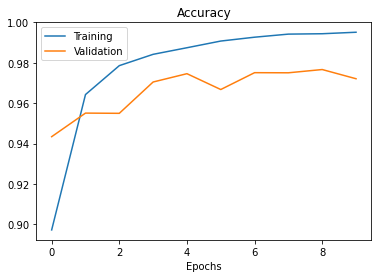

In [26]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs');

In [28]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.1303 - accuracy: 0.9748


0.9747999906539917

### Tensor Math

In [35]:
A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2, 3))

In [30]:
A

array([[[[9, 5, 0, 6, 8],
         [2, 7, 8, 9, 9],
         [4, 4, 7, 3, 2],
         [4, 5, 1, 2, 2]],

        [[7, 0, 9, 4, 1],
         [0, 1, 8, 6, 4],
         [2, 6, 3, 7, 1],
         [8, 9, 8, 3, 2]],

        [[7, 7, 8, 8, 5],
         [9, 1, 4, 4, 6],
         [4, 7, 2, 2, 3],
         [6, 7, 4, 6, 1]]],


       [[[1, 9, 9, 9, 3],
         [6, 3, 8, 5, 3],
         [8, 3, 2, 1, 2],
         [9, 1, 8, 0, 6]],

        [[9, 3, 8, 2, 7],
         [3, 8, 3, 3, 7],
         [8, 1, 9, 0, 8],
         [9, 0, 0, 3, 3]],

        [[8, 1, 4, 7, 9],
         [1, 2, 5, 2, 1],
         [9, 0, 2, 9, 1],
         [2, 4, 0, 3, 4]]]])

In [31]:
A[0, 1, 0, 3]

4

In [32]:
B

array([[6, 3, 8],
       [8, 3, 9]])

#### A random colored image

In [36]:
img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
img

array([[[221,  56,  10],
        [167,  75, 124],
        [ 90, 223, 147],
        [ 84, 122, 248]],

       [[206,  81, 124],
        [ 11,   1,  15],
        [175,  14, 237],
        [ 90, 200, 182]],

       [[153,  68, 202],
        [201,  19,  36],
        [  3,  80,  27],
        [108,  72, 236]],

       [[129,  91, 202],
        [186, 148, 192],
        [ 97, 107, 188],
        [166, 156, 157]]], dtype=uint8)

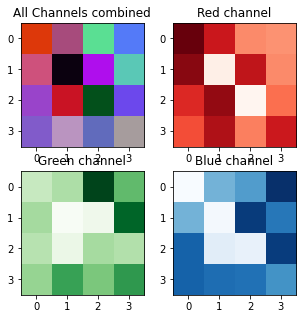

In [37]:
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel");

### Tensor operations

In [38]:
2 * A

array([[[[ 4,  2, 10, 18, 18],
         [ 4,  4,  6, 16, 12],
         [ 0, 12,  2,  0,  6],
         [14,  6, 10,  6,  2]],

        [[ 8, 10,  2, 18, 18],
         [10,  2, 10,  6, 16],
         [ 4, 10,  4,  6,  0],
         [ 6,  4,  2, 18,  0]],

        [[ 8, 16,  0, 10,  2],
         [ 6,  0,  6, 16,  2],
         [ 6, 12, 14, 10, 14],
         [ 4, 10,  6, 14,  4]]],


       [[[ 0,  4,  0, 16,  8],
         [ 4,  4, 14,  0,  2],
         [ 6,  4, 18, 14, 16],
         [ 2,  6, 10,  4,  2]],

        [[14,  4,  8,  4, 14],
         [16,  4, 12, 10, 14],
         [14, 10, 14, 10, 14],
         [ 6,  4, 14,  0,  8]],

        [[ 0,  2,  0,  6, 10],
         [16,  2, 12,  6,  6],
         [ 4,  8, 14,  6, 14],
         [ 4, 12, 12, 10, 10]]]])

In [39]:
A + A

array([[[[ 4,  2, 10, 18, 18],
         [ 4,  4,  6, 16, 12],
         [ 0, 12,  2,  0,  6],
         [14,  6, 10,  6,  2]],

        [[ 8, 10,  2, 18, 18],
         [10,  2, 10,  6, 16],
         [ 4, 10,  4,  6,  0],
         [ 6,  4,  2, 18,  0]],

        [[ 8, 16,  0, 10,  2],
         [ 6,  0,  6, 16,  2],
         [ 6, 12, 14, 10, 14],
         [ 4, 10,  6, 14,  4]]],


       [[[ 0,  4,  0, 16,  8],
         [ 4,  4, 14,  0,  2],
         [ 6,  4, 18, 14, 16],
         [ 2,  6, 10,  4,  2]],

        [[14,  4,  8,  4, 14],
         [16,  4, 12, 10, 14],
         [14, 10, 14, 10, 14],
         [ 6,  4, 14,  0,  8]],

        [[ 0,  2,  0,  6, 10],
         [16,  2, 12,  6,  6],
         [ 4,  8, 14,  6, 14],
         [ 4, 12, 12, 10, 10]]]])

In [40]:
A.shape

(2, 3, 4, 5)

In [41]:
B.shape

(2, 3)

In [42]:
np.tensordot(A, B, axes=([0, 1], [0, 1]))

array([[ 87, 109,  36, 181, 172],
       [160,  39, 168, 128, 128],
       [ 97, 143, 194, 136, 180],
       [ 79, 118, 141, 149,  75]])

In [43]:
np.tensordot(A, B, axes=([0], [0])).shape

(3, 4, 5, 3)

### 1D convolution

In [44]:
a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

In [45]:
b = np.array([-1, 1], dtype='float32')

In [46]:
c = np.convolve(a, b)

In [47]:
a

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

In [48]:
b

array([-1.,  1.], dtype=float32)

In [49]:
c

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

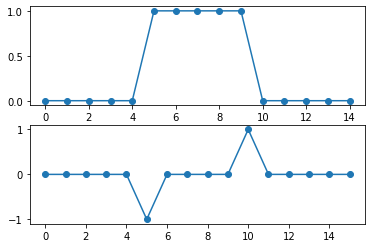

In [50]:
plt.subplot(211)
plt.plot(a, 'o-')

plt.subplot(212)
plt.plot(c, 'o-');

### Image filters with convolutions

In [51]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [52]:
img = misc.ascent()

In [53]:
img.shape

(512, 512)

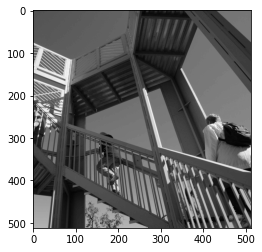

In [54]:
plt.imshow(img, cmap='gray');

In [55]:
h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])


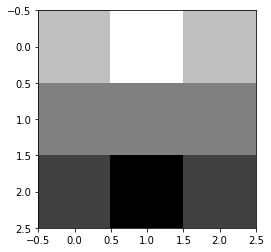

In [56]:
plt.imshow(h_kernel, cmap='gray');

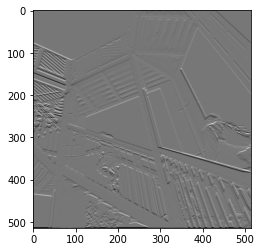

In [57]:
res = convolve2d(img, h_kernel)

plt.imshow(res, cmap='gray');

## Convolutional neural networks

In [58]:
from tensorflow.keras.layers import Conv2D

In [59]:
img.shape

(512, 512)

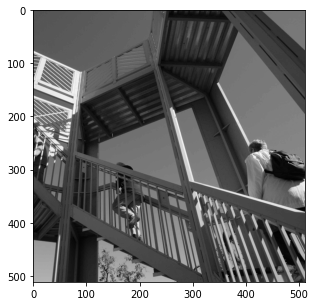

In [60]:
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray');

In [61]:
img_tensor = img.reshape((1, 512, 512, 1))

In [62]:
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [63]:
img_pred_tensor = model.predict(img_tensor)

In [64]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [65]:
img_pred = img_pred_tensor[0, :, :, 0]

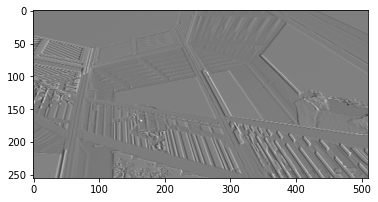

In [66]:
plt.imshow(img_pred, cmap='gray');

In [67]:
weights = model.get_weights()

In [68]:
weights[0].shape

(3, 3, 1, 1)

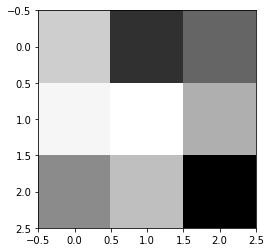

In [69]:
plt.imshow(weights[0][:, :, 0, 0], cmap='gray');

In [70]:
weights[0] = np.ones(weights[0].shape)

In [71]:
model.set_weights(weights)

In [72]:
img_pred_tensor = model.predict(img_tensor)

In [73]:
img_pred = img_pred_tensor[0, :, :, 0]

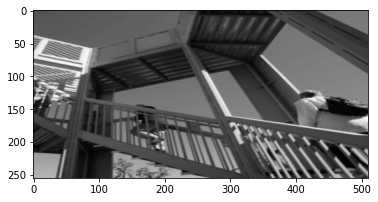

In [74]:
plt.imshow(img_pred, cmap='gray');

In [75]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)


img_pred_tensor.shape

(1, 512, 512, 1)

## Pooling layers

In [76]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

In [77]:
model = Sequential()
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [78]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

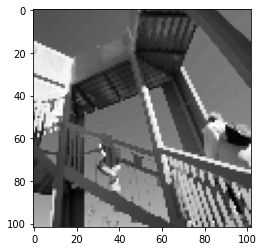

In [79]:
plt.imshow(img_pred, cmap='gray')

In [80]:
model = Sequential()
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

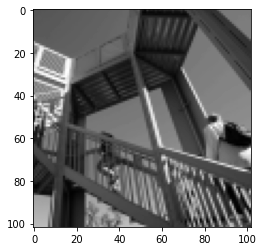

In [81]:
img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray');

## Final architecture

In [82]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [83]:
X_train.shape

(60000, 28, 28, 1)

In [84]:
from tensorflow.keras.layers import Flatten, Activation

In [85]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [87]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

Epoch 1/2
329/329 [==============================] - 21s 63ms/step - loss: 0.2785 - accuracy: 0.9178 - val_loss: 0.1593 - val_accuracy: 0.9492
Epoch 2/2
329/329 [==============================] - 21s 63ms/step - loss: 0.0815 - accuracy: 0.9760 - val_loss: 0.0786 - val_accuracy: 0.9768


In [88]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.0624 - accuracy: 0.9793


[0.06239793077111244, 0.9793000221252441]

### Exercise 
You've been hired by a shipping company to overhaul the way they route mail, parcels and packages. They want to build an image recognition system  capable of recognizing the digits in the zipcode on a package, so that it can be automatically routed to the correct location.
You are tasked to build the digit recognition system. Luckily, you can rely on the MNIST dataset for the intial training of your model!

Build a deep convolutional neural network with at least two convolutional and two pooling layers before the fully connected layer.

- Start from the network we have just built
- Insert a `Conv2D` layer after the first `MaxPool2D`, give it 64 filters.
- Insert a `MaxPool2D` after that one
- Insert an `Activation` layer
- retrain the model
- does performance improve?
- how many parameters does this new model have? More or less than the previous model? Why?
- how long did this second model take to train? Longer or shorter than the previous model? Why?
- did it perform better or worse than the previous model?